# Analyze 2012-2016 Revenue Performance

In this challenge, I created a Python script for analyzing the financial records of PyBank.

This notebook will bring all the data sources together and format them for further analysis.


## Data Sources:
* revenue_2009_2016.csv : Processed data from the data-prep


Each dataset is composed of two columns: Date and Revenue.



### Task is to create a Python script that analyzes the records to calculate each of the following:

- The total number of months included in the dataset.

- The total amount of revenue gained over the entire period.

- The average change in revenue between months over the entire period.

- The greatest increase in revenue (date and amount) over the entire period.

- The greatest decrease in revenue (date and amount) over the entire period.


### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [3]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [4]:
# Directory Location and Filenames

dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

In [5]:
# Load Data into csv

df = pd.read_csv(os.path.join(dir, file), parse_dates=['Date'], index_col='Date')
df[:5]

,Revenue
Date,
2009-01-01,943690.0
2009-02-01,1062565.0
2009-03-01,210079.0
2009-04-01,-735286.0
2009-05-01,842933.0


In [6]:
## Display - typeformat

pd.set_option('display.float_format', '{:,.0f}'.format)

In [7]:
df.describe()

,Revenue
count,86
mean,"650,527"
std,"680,460"
min,"-1,063,151"
25%,"279,551"
50%,"686,900"
75%,"1,118,162"
max,"2,211,086"


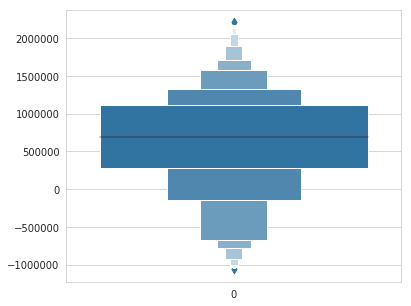

In [8]:
plt.figure(figsize=(6, 5))
ax = sns.boxenplot(data=df['Revenue'])

In [9]:
df.dtypes

Revenue    float64
dtype: object

In [10]:
df.memory_usage(deep=True)

Index      3248
Revenue     688
dtype: int64

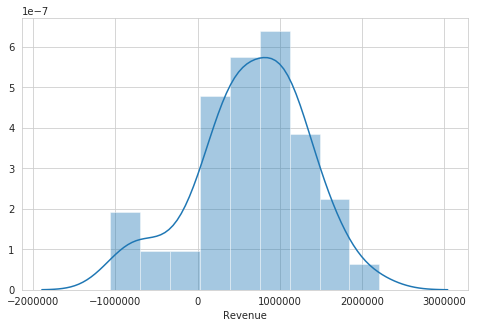

In [11]:
# Plot the Distribution for Revenue
plt.figure(figsize=(8, 5))
sns.distplot(df['Revenue'])

Text(0,0.5,'Revenue')

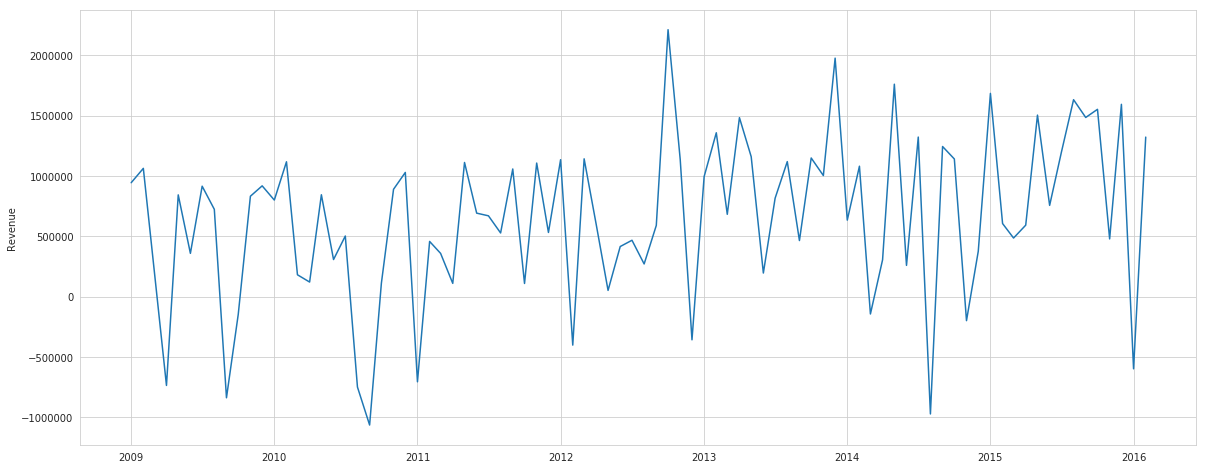

In [12]:
# Plot the Distribution for Revenue
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=df['Revenue'])
ax.tick_params(labelsize=10)
ax.set_ylabel('Revenue', fontsize=10)

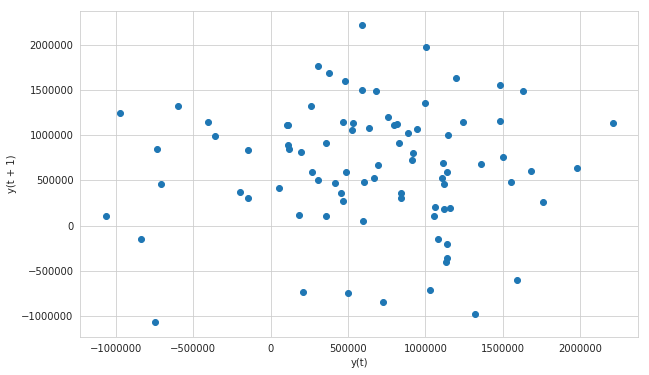

In [13]:
#Use Lagplot

from pandas.plotting import lag_plot
plt.figure(figsize=(10, 6))
lag_plot(df['Revenue'])

> It looks like months' revenue are not correlated with one another.

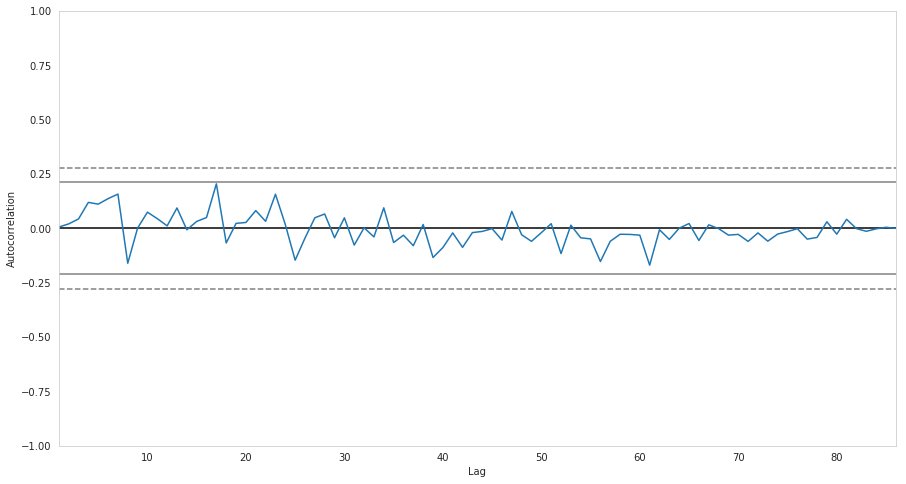

In [14]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15, 8))
autocorrelation_plot(df['Revenue'])

> In an autocorrelation plot the lag is on the x-axis and the autocorrelation score is on the y-axis. The farther away the autocorrelation is from 0, the greater the influence that records that far away from each other exert on one another.

    Here is what an autocorrelation plot looks like when applied to the revenue data:

---

In [20]:
# Check for monthly periodic signal

dfmonth = df[['Revenue']].groupby([ df.index.month, df.index.year])['Revenue'].sum()
dfmonth

Date  Date
1     2009      943,690
      2010      800,038
      2011     -705,201
      2012    1,134,360
      2013      994,779
      2014      633,816
      2015    1,683,373
      2016     -597,463
2     2009    1,062,565
      2010    1,117,103
      2011      457,393
      2012     -401,260
      2013    1,357,358
      2014    1,080,446
      2015      605,485
      2016    1,321,423
3     2009      210,079
      2010      181,220
      2011      358,440
      2012    1,141,606
      2013      682,089
      2014     -143,444
      2015      485,584
4     2009     -735,286
      2010      120,968
      2011      110,092
      2012      594,289
      2013    1,482,637
      2014      305,451
      2015      592,122
                ...    
8     2014     -971,379
      2015    1,631,245
9     2009     -837,468
      2010   -1,063,151
      2011    1,057,492
      2012      589,902
      2013      464,696
      2014    1,243,528
      2015    1,484,044
10    2009     -146,929
     

In [18]:
# Check for quarter periodic signal

dfquarter = df.groupby([ df.index.quarter, df.index.year])['Revenue'].sum()
dfquarter

Date  Date
1     2009    2,216,334
      2010    2,098,361
      2011      110,632
      2012    1,874,706
      2013    3,034,226
      2014    1,570,818
      2015    2,774,442
      2016      723,960
2     2009      466,338
      2010    1,272,448
      2011    1,913,141
      2012    1,061,398
      2013    2,837,510
      2014    2,324,107
      2015    2,851,680
3     2009      800,912
      2010   -1,309,489
      2011    2,254,703
      2012    1,327,950
      2013    2,398,874
      2014    1,593,899
      2015    4,312,011
4     2009    1,602,553
      2010    2,029,483
      2011    1,747,503
      2012    2,989,578
      2013    4,126,952
      2014    1,317,584
      2015    3,622,709
Name: Revenue, dtype: float64

In [ ]:
# Summarizing Stocks by Quarter
# Highligh - Max Revenue
# Red - Revenue Loss

dfq = pd.DataFrame(df.resample('Q').Revenue.sum())
dfq.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

In [ ]:
# Plot the Distribution for Revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfq['Revenue'])
ax.tick_params(labelsize=10)
ax.set_ylabel('Revenue', fontsize=10)

In [ ]:
# Quarterly Revenue

plt.figure(figsize=(12, 6))
ax =sns.barplot(x=dfq.index, y=dfq.Revenue, data=dfq)
ax.tick_params(labelsize=10)
ax.set_ylabel('Revenue', fontsize=10)

In [ ]:
# Summarizing Stocks by Year
# Highligh - Max Revenue
# Red - Revenue Loss

dfy = df.resample('A-DEC').sum()

dfy.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

In [ ]:
# Revenue Per year

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=dfy.index, y=dfy.Revenue, data=dfy)
ax.tick_params(labelsize=10)
ax.set_ylabel('Revenue', fontsize=10)